<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [183]:
# import required packages
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import pandas as pd
from random import sample
plt.style.use('dark_background') # for sake of dark theme enjoyers :)

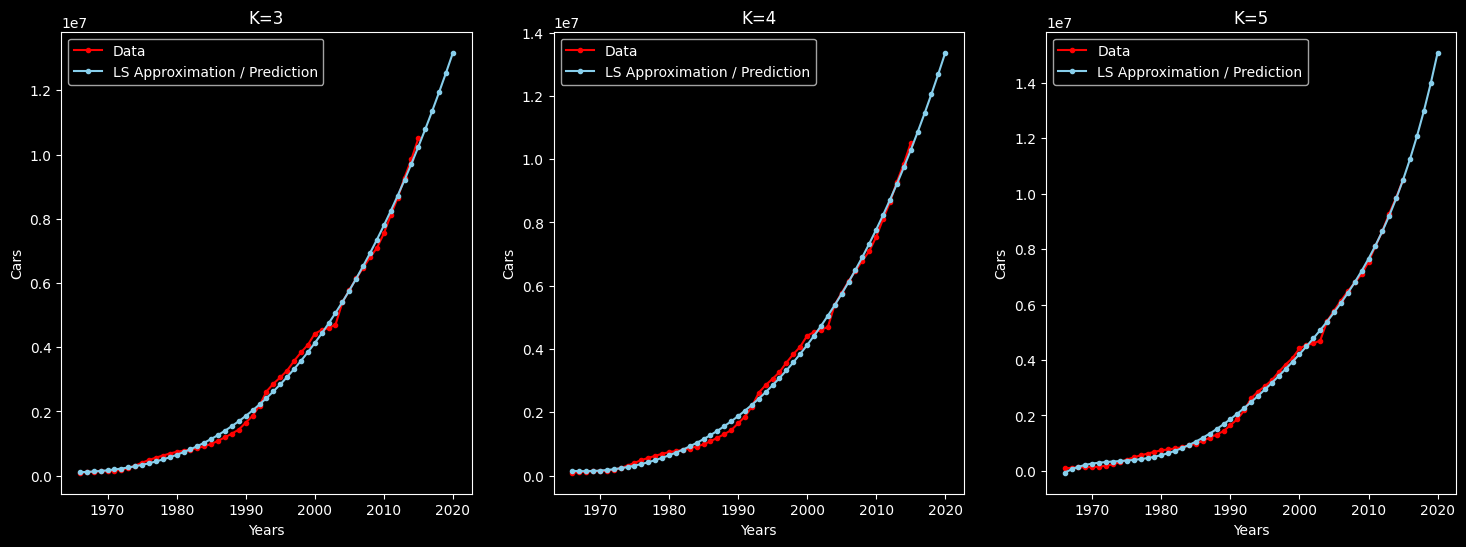

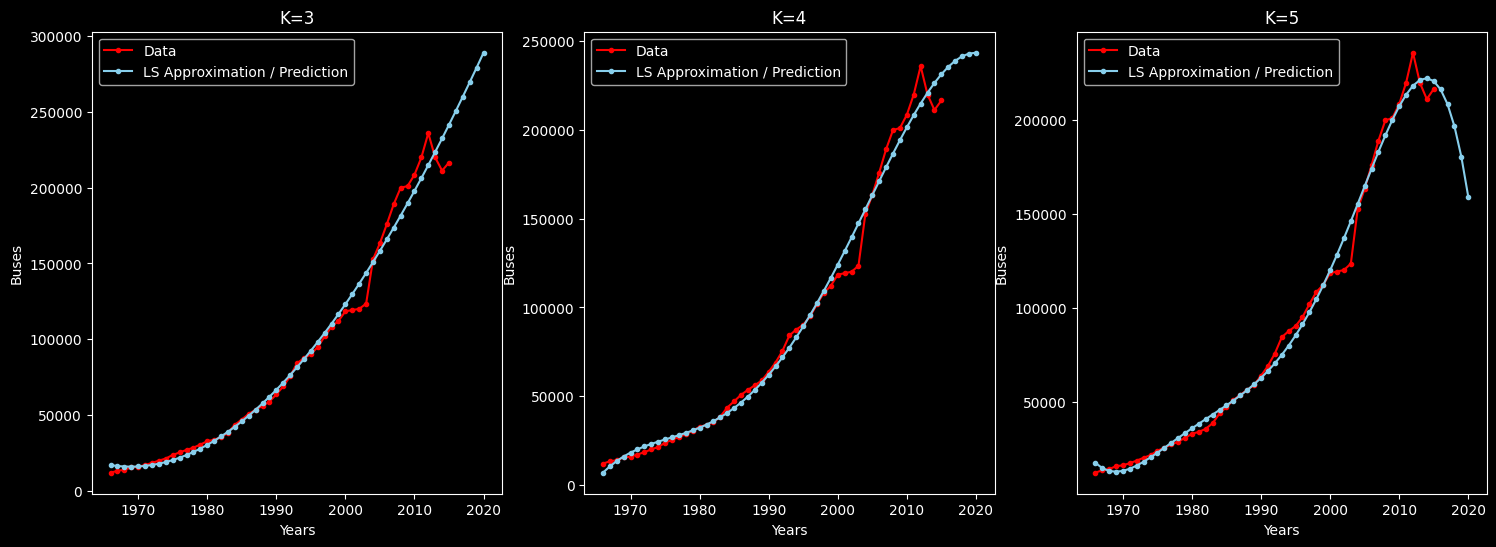

In [185]:
def LS_coefs(x,y,degree):
  x = np.array(x ,dtype=int)
  b = np.array(y ,dtype=int)
  AT = np.ones(len(x) ,dtype=int)


  for k in range(1,degree+1):
    powered = np.power(x,k).flatten()
    AT = np.vstack((AT, powered))

  A = np.transpose(AT)
  x_ls = np.dot( np.dot( np.linalg.inv( np.dot(AT,A) ),AT ),b)       #x_ls = ((A^T.A)^(-1)).A^T.b
  return x_ls                                                        # we could also use numpy.linalg.lstsq


def plot(x,y,coefs3,coef4,coef5,y_name):
  x_prime = np.linspace(0,54,55)
  y_prime3 ,y_prime4, y_prime5 = 0,0,0


  for i in range(len(coefs3)):
    y_prime3 += coefs3[i]*(x_prime**i)

  for i in range(len(coefs4)):
    y_prime4 += coefs4[i]*(x_prime**i)

  for i in range(len(coefs5)):
    y_prime5 += coefs5[i]*(x_prime**i)


  fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

  # we'll shift the x back to 1966
  data1, = ax1.plot(x+1966, y, 'o-',markersize=3,color='red')
  LS1, = ax1.plot(x_prime+1966, y_prime3, 'o-',markersize=3,color='skyblue')
  ax1.set_xlabel('Years')
  ax1.set_ylabel(y_name)
  ax1.set_title('K=3')
  ax1.legend([data1,LS1],['Data','LS Approximation / Prediction'])


  data2, = ax2.plot(x+1966, y, 'o-',markersize=3,color='red')
  LS2, = ax2.plot(x_prime+1966, y_prime4, 'o-',markersize=3,color='skyblue')
  ax2.set_xlabel('Years')
  ax2.set_ylabel(y_name)
  ax2.set_title('K=4')
  ax2.legend([data2,LS2],['Data','LS Approximation / Prediction'])


  data3, = ax3.plot(x+1966, y, 'o-',markersize=3,color='red')
  LS3, = ax3.plot(x_prime+1966, y_prime5, 'o-',markersize=3,color='skyblue')
  ax3.set_xlabel('Years')
  ax3.set_ylabel(y_name)
  ax3.set_title('K=5')
  ax3.legend([data3,LS3],['Data','LS Approximation / Prediction'])

  plt.show()




df = pd.read_csv("arac.csv")

#df adjustments
col_names = list((df.columns).str.split(';'))
df = df.iloc[:, 0].str.split(';', expand=True)
df.columns = col_names

df = df[["Year","Car","Bus"]]
df = df.astype(int)

car = df["Car"]
bus = df["Bus"]
years = df["Year"]-1966

# All years are higher than 1966 so we deduct it from them to get an unbiased fit
# we'll add it back once we're done with the calculations and ready to plot.


coefs3 = LS_coefs(years,car,3)
coefs4 = LS_coefs(years,car,4)
coefs5 = LS_coefs(years,car,5)
plot(years,car,coefs3,coefs4,coefs5,"Cars")


coefs3 = LS_coefs(years,bus,3)
coefs4 = LS_coefs(years,bus,4)
coefs5 = LS_coefs(years,bus,5)
plot(years,bus,coefs3,coefs4,coefs5,"Buses")


we can see that higher K estimations may change our prediction. It's sorta the same for the cars but for the busses we can see that the higher k is, the more curves it has as they're following a higher degree polynomial. As a matter of fact we should
go with sth neither underfitting nor overfitting.

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [186]:
def load_data(file_name):
    df = pd.read_csv(file_name,header=None)
    X = np.matrix(df)
    return X

X = load_data("Image.csv")
print(X.shape)

(600, 2)


- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [187]:
def kmeans(X, K):

  epsilon = 0.00000001 #used to compare new centroids with the previous ones
  best_varience = 100
  best_indicing = np.ones(len(X), dtype=int)
  iterations = 30

# I've used 30 loops to find the best centroids and I found it
# good enough, but feel free to change it as you wish.

# at each iteration we start with random centroids , then for
# each point we'll find the least norm and least distance to
# one of the centroids and we'll assign the point to it. Now
# we recalibrate the new centroids and we keep going on till
# the new centroids are not much different than the former ones.

# At the end if the results have lowest Var among the answers
# we've found till that moment, we'll save it as the best answer.

  for attempts in range(iterations):

    centroids = np.array(X[sample(range(0, len(X)), K)])
    last_centroids = np.zeros((K,2))
    indices = np.zeros(len(X), dtype=int)
    vars = np.zeros(K)

    while (np.max(np.abs(centroids - last_centroids)) > epsilon):

      last_centroids = centroids.copy()

      for i in range(len(X)):
        # tho we're calculating the norm, it serves the same purpose
        # as the squared distance, as it's just root of it.
        related_cluster_index = np.argmin(np.linalg.norm(X[i] - centroids, axis=1))
        indices[i] = related_cluster_index

      for i in range(len(centroids)):
        centroids[i][0] = np.mean(X[np.where(indices == i)][:,0])
        centroids[i][1] = np.mean(X[np.where(indices == i)][:,1])

    for i in range(len(centroids)):
      vars[i] = np.var(X[np.where(indices == i)])

    var = np.var(vars)
    if var < best_varience:
      best_varience = var
      best_indicing = indices


    M = centroids
    U = best_indicing
    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [192]:
def plot_clusters(X, M, U):
  # to plot K>10 eaither use no color so the plt chooses itself or add more colors below
  colors = ['orange','green','purple','red','pink','skyblue','blue','white','yellow','brown']
  centroids = M

  for i in range(len(M)):
    a = np.array(X[np.where(U == i)][:,0])
    b = np.array(X[np.where(U == i)][:,1])
    plt.scatter(a , b , s=10, label=f"Cluster{i+1}",color=colors[i])


  plt.scatter(centroids[:,0], centroids[:,1], color='w', marker='+', s=50, label="Centroids")

  for x, y in centroids:
    circles = Circle((x,y), 0.13, color='w', fill=False)
    plt.gca().add_patch(circles)

  plt.xlabel('x')
  plt.ylabel('y')
  plt.title(f"KMeans clustering (k={K})")
  plt.legend(loc='best')
  plt.show()

**<font color="red"> Don't edit the code in the following cell!</font>**

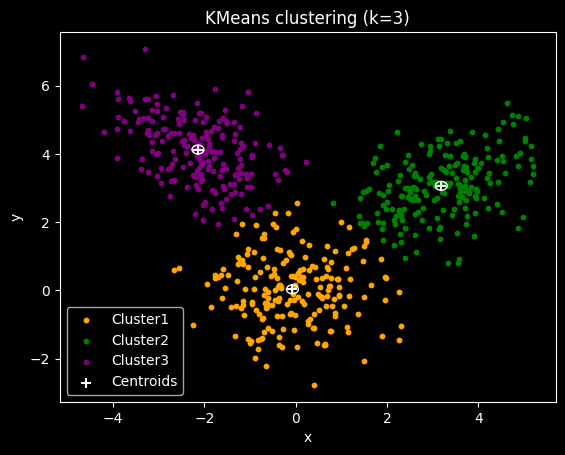

In [193]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

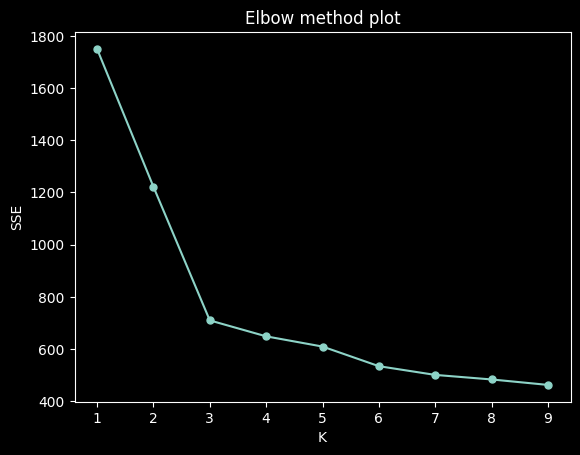

In [195]:
def elbow_method(X, K_list):

  S = np.zeros(len(K_list))

  for K in K_list:
    centroids, indicings = kmeans(X,K)
    SSE = 0

    for i in range(len(X)):
      SSE += np.linalg.norm(X[i] - centroids[indicings[i]], axis=1)

    S[K-1] = SSE
  return S



K_list = np.arange(1,10)
S = elbow_method(X,K_list)
plt.plot(K_list, S,'o-',markersize=5)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title("Elbow method plot")
plt.show()

**A review on the elbow method plot:**

We can see that the breaking or knee point of the plot is on k=3.
Lower K results  are underfitted as they have such high SSE, also higher K results are overfitted as they have more than enough centroids and obviously low SSE. The optimum choice would be the exturmum point of the elbow method plot.

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [197]:
# TODO: First 25 rows of the dataset
sentiments = pd.read_csv("sentiment.csv")
sentiments.head(25)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [198]:
# TODO: Last 10 rows of the dataset
sentiments.tail(10)

,PhraseId,SentenceId,Phrase,Sentiment
9990,9991,419,this a comedy or serious drama,2
9991,9992,419,a comedy or serious drama,2
9992,9993,419,a comedy or,2
9993,9994,419,a comedy,2
9994,9995,419,serious drama,2
9995,9996,420,plays like some corny television production fr...,1
9996,9997,420,plays like some corny television,1
9997,9998,420,like some corny television,2
9998,9999,420,some corny television,1
9999,10000,420,corny television,1


In [199]:
# TODO: information of columns
sentiments.describe()

,PhraseId,SentenceId,Sentiment
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,200.162500,2.044100
std,2886.89568,121.775362,0.833681
min,1.00000,1.000000,0.000000
25%,2500.75000,95.000000,2.000000
50%,5000.50000,195.000000,2.000000
75%,7500.25000,304.000000,2.000000
max,10000.00000,420.000000,4.000000


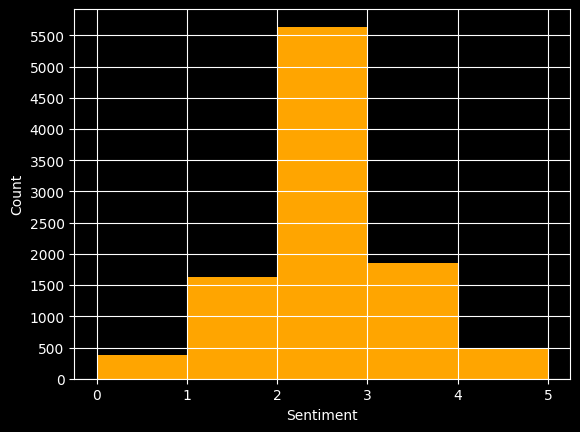

In [200]:
# TODO: histogram of sentiment scores
bin_edges = range(6)
plt.hist(sentiments["Sentiment"], bins=bin_edges, color='orange')
plt.xticks(bin_edges)
plt.yticks(np.arange(0, 6000, 500))
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [201]:
nltk.download('stopwords')          #---> only needed on the first run
def preprocess_text(text):

  text = text.lower()
  text = re.sub(r'[^\w\s]','', text)
  stop_words = stopwords.words('english')
  filtered_tokens = re.compile(r"\b(" + "|".join(stop_words) + r")\b") # we could add , flags=re.I to make it
  text = filtered_tokens.sub('', text)                                 # case-insensitive but we've already taken care of it

  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [202]:
# TODO: Apply the preprocessing function to the text column

sentiments["Phrase"] = sentiments["Phrase"].apply(preprocess_text)
#sentiments.drop(sentiments[sentiments['Phrase'] == ''].index , inplace=True)
sentiments.head()


# Some of the lines turn out to be empty after the preprocess function so I
# thought removing them may give us better results in the training process.
# So I tried both and not removing them had a better MSE by 0.011 difference
# so I commented the line up there. Tho lower MSE doesn't necessarily mean
# we've reached a better model, but it's only 0.011, so whatever, I guess
# it doesn't matter at all :)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,series escapades demonstrating adage goo...,1
1,2,1,series escapades demonstrating adage goo...,2
2,3,1,series,2
3,4,1,,2
4,5,1,series,2


### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

**Answer :**

"Bag of Words" is a simple method to analyze text contents. First we define a collection of words of all sentences in the given dataset, then we count how many of each word, each sentence had. Then we'll have a vector for each text that we can continue our calculations with and will give us sth to work with rather than some bunch of words. However this method have downsides. To elucidate this issue, let's take a look at this comment :

"I don't like movies like this!"

Basically the word "like" has two different meanings in the sentence above, but the algorithm treats both the same. So it's a trade-off between the accuracy and not being sophisticated and keeping calculations simple. Under some circumstances it perfectly serves its purpose.For instance to block spam E-mails having spam/scam words in our BoW like : "money", "rich", "free" , ... will help us to automatically detect those E-mails & put them in spam section or simply block the senders.


To implement this method in python we use CountVectorizer. First we make an object from it. Then we use fit.transform method to extract the features. Now when we want to do the training part, we'll just use transfom method rather than fitting it as we've already found our Bag-of-Words.

In [204]:
# TODO: Extract features from the preprocessed text data
CV = CountVectorizer()
CV.fit_transform(sentiments["Phrase"])
print("Here are the feature_names:",end=" ")
print(f"{CV.get_feature_names_out()}\n")

#print("Here are some feature names and their index:")
#list(CV.vocabulary_.items())[:10]

Here are the feature_names: ['10' '100' '100minute' ... 'zhuangzhuang' 'zingers' 'zip']



### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE)

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [205]:
# TODO: Split the dataset into training and testing sets
X = sentiments['Phrase']
Y = sentiments['Sentiment']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


# TODO: Train a linear regression model
X_train_CV = CV.transform(X_train.values)
reg = LinearRegression().fit(X_train_CV, Y_train)

# TODO: Make predictions on the testing set
X_test_CV = CV.transform(X_test.values)
Y_test_pred = reg.predict(X_test_CV)
Y_test_pred[Y_test_pred<0] = 0           # Rounding predictions that are out of
Y_test_pred[Y_test_pred>4] = 4           # the boundaries to the boundary values


# TODO: Evaluate the model using mean squared error
MSE = mean_squared_error(Y_test, Y_test_pred)
print("Mean Squared Error:", MSE)

Mean Squared Error: 0.43467001782850573


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

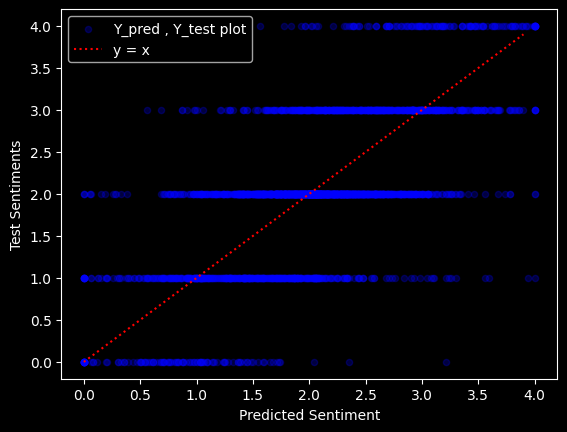

In [206]:
plt.scatter(Y_test_pred, Y_test, s=20 , color='blue', alpha=0.25, label="Y_pred , Y_test plot")
plt.plot(np.arange(0,4,0.1) , np.arange(0,4,0.1) , color='red', linestyle='dotted', label="y = x")
plt.xlabel('Predicted Sentiment')
plt.ylabel('Test Sentiments')
plt.legend(loc="best")
plt.show()

## <font color="red"> Discuss the resulted figure </font>

We can kinda see that the whole plot follows a y = x pattern. The vague dots around the y = x flow, resemble that MSE of 0.43 we calculated above. The reason it may not seem so accurate is that linear regression doesn't necessarily give adequately good results here, as the emotions expressed in comments are definitely complex to be predicted with a line.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

Extra words of manual BoW : ['3', '7', 'b', 'n', 'q', 'x']

We can see that out manual function kinda has the same words except for these 6 letter/numbers
that were probably removed by CountVectorizer itself, as these letters doesn't contain any meaning.
We can remove them as well but it won't make much difference as it's only 6 in 2445. It could have more
impact if 1-char words or letters were more frequent!

MSE(manual function): 0.525 vs MSE(CountVectorizer): 0.4347

This difference is cause by those 6 letters. Removing them will give us the same result as CounterVectorizer
but I just let it be so we can have a comparision between them and to have a vision on what will these extra
letters cause.



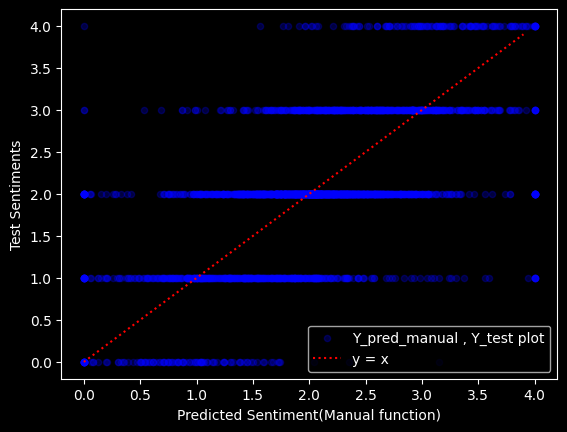

In [210]:
#making BoW by extracting unique words of the Phrases
def feature_extractor(sentences):
  word_list = []
  for sentence in sentences:
    word_list.extend(sentence.split())

  BoW = np.unique(np.array(word_list))   # changing list to an array of unique words
  return BoW


#making a countVector for each Phrase
def countVectorizer(BoW, sentences):
  CV = np.zeros((len(sentences), len(BoW)))
  for i, sentence in enumerate(sentences):
    for j, words in enumerate(BoW):
      CV[i, j] = sentence.count(words)
  return CV




BoW = feature_extractor(sentiments["Phrase"])

difference = [word for word in BoW if word not in CV.get_feature_names_out()]
print(f"Extra words of manual BoW : {difference}")
print("\nWe can see that out manual function kinda has the same words except for these 6 letter/numbers\n"
      "that were probably removed by CountVectorizer itself, as these letters doesn't contain any meaning.\n"
      "We can remove them as well but it won't make much difference as it's only 6 in 2445. It could have more\n"
      "impact if 1-char words or letters were more frequent!\n")


X_train_CV_manual = countVectorizer(BoW, np.array(X_train))
reg_manual = LinearRegression().fit(X_train_CV_manual, Y_train)

X_test_CV_manual = countVectorizer(BoW, np.array(X_test))
Y_test_pred_manual = reg_manual.predict(X_test_CV_manual)
Y_test_pred_manual[Y_test_pred_manual<0] = 0           # Rounding predictions that are out of
Y_test_pred_manual[Y_test_pred_manual>4] = 4           # the boundaries to the boundary values


# TODO: Evaluate the model using mean squared error
MSE_prime = mean_squared_error(Y_test, Y_test_pred_manual)
print(f"MSE(manual function): {round(MSE_prime,4)} vs MSE(CountVectorizer): {round(MSE,4)}\n")
print("This difference is cause by those 6 letters. Removing them will give us the same result as CounterVectorizer\n"
      "but I just let it be so we can have a comparision between them and to have a vision on what will these extra\n"
      "letters cause.\n")



plt.scatter(Y_test_pred_manual, Y_test, s=20 , color='blue', alpha=0.25, label="Y_pred_manual , Y_test plot")
plt.plot(np.arange(0,4,0.1) , np.arange(0,4,0.1) , color='red', linestyle='dotted', label="y = x")
plt.xlabel('Predicted Sentiment(Manual function)')
plt.ylabel('Test Sentiments')
plt.legend(loc="best")
plt.show()